In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [3]:

data = np.genfromtxt('motor_power.csv', delimiter='\t')[1:,:]

35.1507500521516


Text(0, 0.5, 'predicted / sent power')

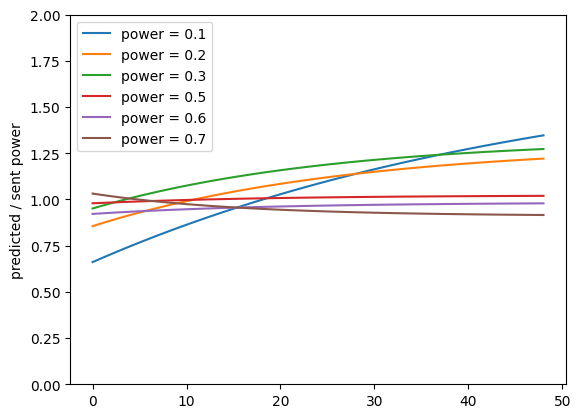

In [4]:

K = 6
power = data[:50*K, 0]
vel = data[:50*K, 1]


t = np.linspace(0,50*50/1000,50)
pows = []
vtops = []
for i in range(K):
    vi = vel[50*i:50*(i+1)]
    (k0_,k1_,k2_), _ = scipy.optimize.curve_fit(lambda t,a,b,c: c-b*np.exp(-a*t),  t,  vi, maxfev=5000)
    vs = k2_-k1_*np.exp(-k0_*t)
    v = vs[1:]
    vtop = k2_-k1_*np.exp(-k0_*100000)
    P = power[i*50]
    vtop_predict = 35 * P
    a = np.diff(vs)/0.050
    ar = a #+ 1.8 - 2.6*v/vtop_predict
    pows.append(P)
    vtops.append(vtop)
    # plt.plot(v, ar)
    plt.plot((ar / 40 + v / 35)/P)
    # voltage = base_voltage * (torque/stall_torque + vel/no_load_vel)


(k ,), _ = scipy.optimize.curve_fit(lambda t,k: k*t, pows, vtops)
print(f"{k}")
# pls = np.linspace(-1,1,50)
# plt.plot(pows, vtops)
# plt.plot(pls, k0*np.tanh(k1 * pls))

plt.legend([f"power = {x}" for x in power[::50]])
plt.ylim([0,2])

# plt.xlabel("vel")
# plt.ylabel("acc")

# plt.xlabel("acc(measured)")
# plt.ylabel("acc(predicted)")

plt.ylabel("predicted / sent power")

In [5]:
import sympy

p = sympy.var("p")
a = sympy.var("a")
v = sympy.var("v")
vt = 25 * sympy.tanh(p * 2)
s = sympy.solve((vt - v) - a, p)

In [6]:
print(s)
s[2]

[log(-I*(-a/(a + v - 25) - v/(a + v - 25) - 25/(a + v - 25))**(1/4)), log(I*(-a/(a + v - 25) - v/(a + v - 25) - 25/(a + v - 25))**(1/4)), log(-(-a/(a + v - 25) - v/(a + v - 25) - 25/(a + v - 25))**(1/4)), log((-a/(a + v - 25) - v/(a + v - 25) - 25/(a + v - 25))**(1/4))]


log(-(-a/(a + v - 25) - v/(a + v - 25) - 25/(a + v - 25))**(1/4))

In [7]:
sympy.solve(sympy.tanh(p)-a, p)

[log(-sqrt(-(a + 1)/(a - 1))), log(sqrt(-(a + 1)/(a - 1)))]

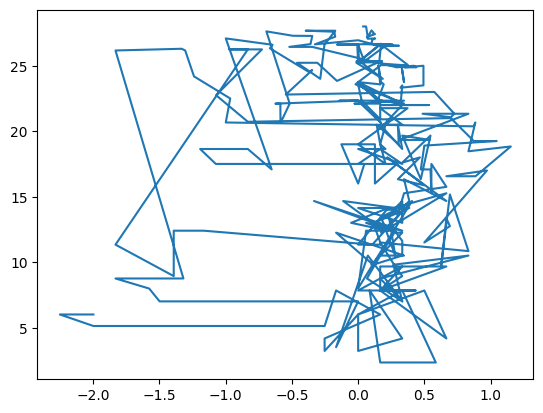

In [8]:
power = data[:300, 0]
vel = data[:300, 1]

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

plt.plot(np.diff(smooth(vel,10)), (40*P - vel*(1+ (power-0.5)*0.5))[1:], )